In [296]:
import numpy as np
from scipy import signal
import scipy.io.wavfile
import matplotlib.pyplot as plt
import math
from IPython.display import Audio

In [297]:
np.random.seed(0)
n_samples=500
time = np.linspace(0,8,n_samples)

sample1_data = np.sin(4*time) # Signal 1 : sinusoidal signal
sample2_data = np.sign(np.sin(2*time)) # Signal 2 : square signal
sample3_data = signal.sawtooth(1.0 * np.pi * time) # Signal 3 : saw tooth signal

In [298]:
def sigmoid(y):
    g=np.divide(1,np.add(1,np.exp(-y)))
    return g

def gradient(eta, Y, W):
    delW=np.zeros(W.shape)
    Z=sigmoid(Y)
    Id=np.identity(Y.shape[0])
    grad=eta*(Id+np.dot((1-2*Z),Y.T))*W
    return grad

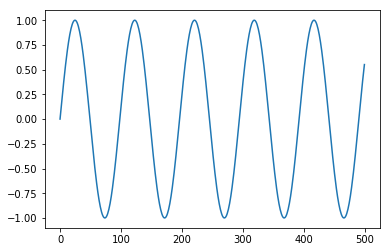

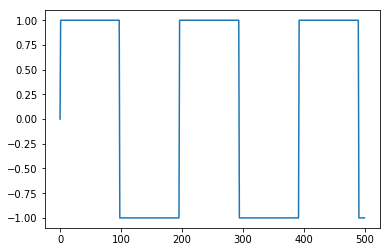

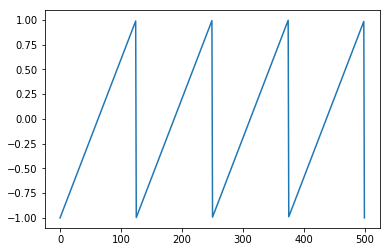

In [299]:
plt.figure(1)
plt.plot(sample1_data)
plt.show()
plt.figure(2)
plt.plot(sample2_data)
plt.show()
plt.figure(3)
plt.plot(sample3_data)
plt.show()

Mixing matrix: 
[[ 0.61209572  0.616934    0.94374808]
 [ 0.6818203   0.3595079   0.43703195]
 [ 0.6976312   0.06022547  0.66676672]]


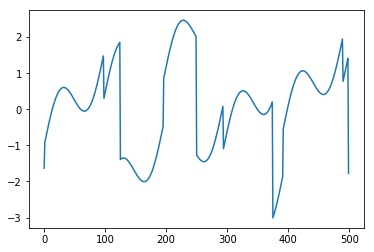

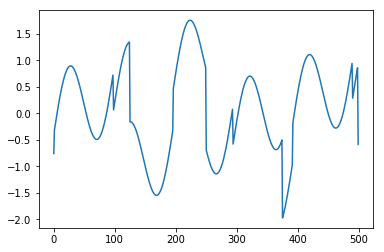

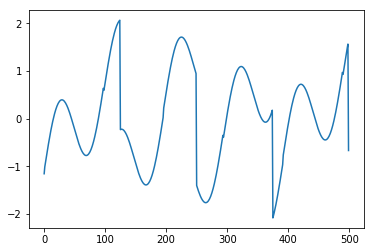

Initial guessed decomposition matrix: 
[[ 0.26713452 -0.22187155 -0.18031398]
 [-0.34042506  0.37858652  0.20359813]
 [-0.00658662 -0.02468076  0.12072241]]


In [314]:
med1=sample1_data.std(axis=0)
s1data= sample1_data/med1
med2=sample2_data.std(axis=0)
s2data=sample2_data/med2
med3=sample3_data.std(axis=0)
s3data=sample3_data/med3

orig=np.matrix([s1data,s2data,s3data])
n=len(orig)
A=np.random.random([n,n])
print("Mixing matrix: \n"+str(A))
X=np.dot(A,orig)
plt.figure(1)
plt.plot(X[0].T)
plt.show()
plt.figure(2)
plt.plot(X[1].T)
plt.show()
plt.figure(3)
plt.plot(X[2].T)
plt.show()
print("Initial guessed decomposition matrix: \n"+str(W))

In [315]:
Audio(data=X[0], rate=16000)

In [316]:
Audio(data=X[1], rate=16000)

In [320]:
eta=0.005
eta0=eta
T=1000
num_iter=50000

W=np.random.random([n,n])/100
print(W)
for i in range(0,num_iter):
    Y=np.dot(W,X)
    delW=gradient(eta,Y,W)
    aux=W+delW
    W=aux
    eta=eta0/(1+(i/T))
    #if i%100==0:
        #print("delW "+str(delW))
        #print("W "+str(W))
    #print("eta "+str(eta))

[[ 0.00208877  0.0016131   0.00653108]
 [ 0.00253292  0.00466311  0.00244426]
 [ 0.0015897   0.00110375  0.0065633 ]]


[[ 0.09253526 -0.16085427  0.06909735]
 [ 0.0168435   0.14221705 -0.10954667]
 [-0.09441274  0.06263232  0.10056086]]


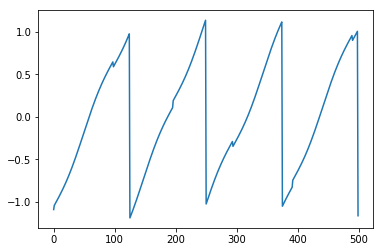

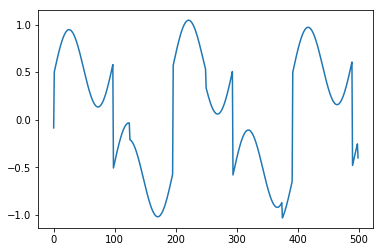

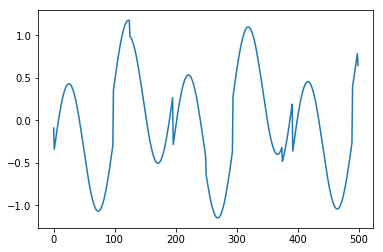

In [322]:
print(W)
plt.figure(1)
plt.plot(Y2[0].T)
plt.show()
plt.figure(2)
plt.plot(Y2[1].T)
plt.show()
plt.figure(3)
plt.plot(Y2[2].T)
plt.show()

In [305]:
Audio(data=Y2[0], rate=16000)

In [306]:
Audio(data=Y2[1], rate=16000)

In [307]:
Audio(data=sample1_data, rate=16000)

In [308]:
Audio(data=sample2_data, rate=16000)